In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Note: Using my 5-day extension for this lab

# A Notch Digital Filter (6 marks, 3/2/1)

A notch filter is a filter that passes almost all frequencies with unit amplitude, except for a narrow
range of frequencies centered on the rejection frequency $f_0$ (at which frequency nothing is passed).

A simple notch digital filter has a z-transform

$$ W(z) = MF(z) F(z)^* = M \frac{z - q}{z - p} \frac{z - q^*}{z - p^*} $$

where $M$ is a normalization factor, $q = e^{-i 2 \pi f_0 / f_s}$, $p = (1 + \epsilon) q$, $f_s$ 
is the sampling rate ($f_s = 1 / \Delta$) and $\epsilon$ is a small positive number ($0 < \epsilon \ll 1$).

 1. What are the poles and zeros of this system? Where are they located with respect to the unit
    circle? Is this a stable system? Is this filter real? 
 2. Given $f_s = 12 \text{ cycles/year}$, $f_0 = 1 \text{ cycle/year}$, $M = 1.05$ and $\epsilon = 0.05$, plot the
    power spectrum $|W(f)|^2=W(f)W(f)^\ast$ (i.e., square of amplitude spectrum). Sample densely in $[-f_s/2, \ldots, f_s/2]$ (e.g. 1000 points), where $f_s/2$ is the Nyquist frequency.
 3. What is the full-width-half-max (FWHM) value $f_\text{fwhm}$ of this notch filter (based on the plot)? Which parameter(s) should you change to make the notches sharper, i.e., $f_\text{fwhm}$ smaller?

_Hint_: For Part 2, $W(f)$ is obtained by $W(z = e^{-i \omega \Delta}$). For Part 3, you don't have to
compute the FWHM value analytically (although it can be done); an inspection of the discrete array of $|W(f)|^2$
vector is sufficient. Note here $f_\text{fwhm}$ is in terms of frequency (1/year), not angular frequency.

# Answers to Part One:

The zeroes of the system are determined by where the numerator of W(z) = 0. Hence z = q and z = q* are the zeroes of the system. The poles correspond to the zeroes of the denominator, which are z = p and z = p*.

Since q is defined using the exponential function with an imaginary argument, it represents a point that lies exactly the unit circle in the complex plane. On the other hand, q is scaled by (1 + 𝜖), so it will lie slightly outside the unit circle, making the system unstable.



Half-Max:  0.49884521091874395
FWHM:  0.2 cycles/year


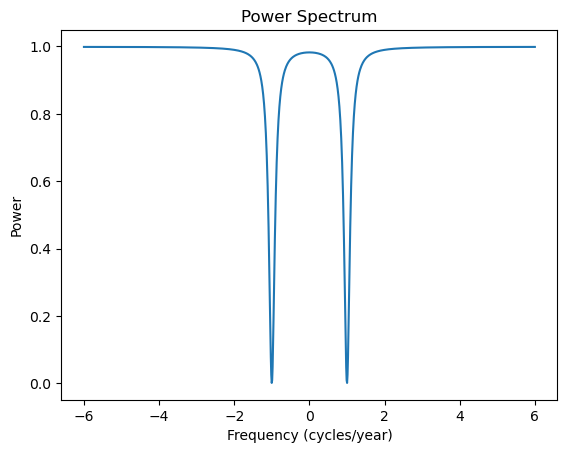

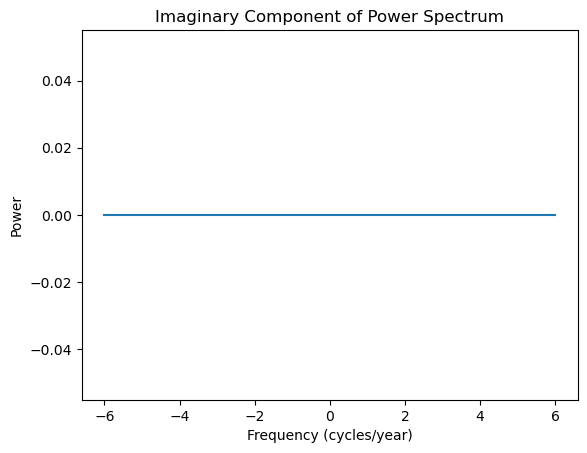

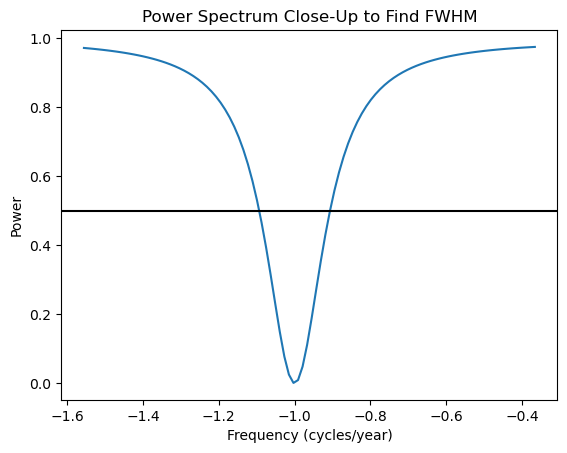

In [3]:
# Collab w/ Abramo Ginevra

import numpy as np
import matplotlib.pyplot as plt


f_0 = 1 # rejection frequency in cycles/year
f_s = 12 # sampling rate in cycles/year
M = 1.05
epsilon = 0.05

q = np.exp(-1j*2*np.pi*(f_0/f_s))
q_star = np.exp(1j*2*np.pi*(f_0/f_s)) 
p = (1 + epsilon)*q
p_star = (1 + epsilon)*q_star


def amplitude_spectrum(f):
    z = np.exp(-1j*2*np.pi*(f/f_s))
    numerator_W = (z - q) * (z - q_star)
    denominator_W = (z - p) * (z - p_star)
    return M * (np.abs(numerator_W/denominator_W))


freqs = np.linspace(-f_s/2, f_s/2, 1000)
power_spectrum = [amplitude_spectrum(f)**2 for f in freqs]
plt.plot(freqs, power_spectrum, label="Power Spectrum")
plt.title("Power Spectrum")
plt.xlabel("Frequency (cycles/year)")
plt.ylabel("Power")
plt.figure();

# Finding the Full-Width Half-Maximum (FWHM) 

# Need to find points around f_0 where the power
# spectrum is at half its maximum value

min_val = np.min(power_spectrum)
max_val = np.max(power_spectrum)
half_max = (max_val-min_val)/2
print("Half-Max: ", half_max)

FWHM = 0.2
print("FWHM: ", FWHM, "cycles/year")

# Plotting Imaginary Part to see if it is nonzero
amp_spectrum = [amplitude_spectrum(f) for f in freqs]
plt.title("Imaginary Component of Power Spectrum")
plt.xlabel("Frequency (cycles/year)")
plt.ylabel("Power")
plt.plot(freqs, np.imag(amp_spectrum), label="Power Spectrum")
plt.figure()

# Slicing
plt.title("Power Spectrum Close-Up to Find FWHM")
plt.xlabel("Frequency (cycles/year)")
plt.ylabel("Power")
sliced = power_spectrum[370:470]
plt.plot(freqs[370:470], sliced)
plt.axhline(half_max, color='k')


# Implementing the Notch Filter (6 marks, 2/2/1/1)

Notch filter introduced in section 1 can be written out fully as

$$ W(z) = \frac{N(z)}{D(z)} = \frac{a + bz + cz^2}{1 + Bz + Cz^2} $$

A filter of the form above can be implemented as two filters in succession: first the 'numerator filter'
`[a b c]` as a 3-term direct convolution, then the 'denominator filter' as the inverse filter of the 3-term
filter `[1 B C]` by feedback filtering.

 1. What are the values of a; b; c; B; C for the notch filter defined in Question 1.2?
 2. Write a function for a general rational digital filter with numerator and denominator
    coefficients N and D which produces the filtered time series $y$ for a given input $x$,
    `y = ratFilter(N,D,x)`. 
 3. Use `ratFilter` function to determine the impulse response of this notch filter (i.e., the output
    of this filter when the input is a discrete delta function). Define the impulse using $dt=1/f_s$ and $t=0$ to $t_{max}=100$ years (i.e. $1200$ samples). Plot the impulse response from $0$ to $6$ years. Speculate on how the impulse response would change if we halve the $f_\text{fwmh}$ value.
 4. Fourier transform the impulse response to obtain the frequency response $|W(f)|$
    of this notch filter. Plot it on top of the magnitude of the theoretical spectrum calculated based on the z-transform, with $f$ ranging from $0$ to $6$ cycles per year.

# Answers to Part Two:

In [4]:
a = M * (q * q_star) / (p * p_star)
b = M * (-(q + q_star)) / (p * p_star)
c = M * (1 / (p * p_star))
B = -(p + p_star) / (p * p_star)
C = 1 / (p * p_star)

print("a =", a)
print("b =", b)
print("c =", c)
print("B =", B)
print("C =", C)

a = (0.9523809523809523+0j)
b = (-1.649572197684645+0j)
c = (0.9523809523809523+0j)
B = (-1.649572197684645+0j)
C = (0.9070294784580498+0j)


In [5]:
def ratFilter(N, D, x):
    """
    Apply rational digital filter defined by numerator and denominator coefficients to input signal x.

    Parameters:
        N (array): Coefficients of the numerator.
        D (array): Coefficients of the denominator.
        x (array): Input signal.

    Returns:
        y (array): Filtered output signal.
    """
    # Initialize output signal
    y = np.zeros_like(x)
    
    # Iterate over input signal
    for n in range(len(x)):
        
        # Apply filter kernel
        for i in range(len(N)):
            if n - i >= 0:
                y[n] += N[i] * x[n - i]
        for j in range(1, len(D)):
            if n - j >= 0:
                y[n] -= D[j] * y[n - j]
    
    return y

Length of Impulse Response: 1200
Length of x-axis 72
Length of truncated data 72


/tmp/ipykernel_95/1280261281.py:22: ComplexWarning: Casting complex values to real discards the imaginary part
  y[n] += N[i] * x[n - i]
/tmp/ipykernel_95/1280261281.py:25: ComplexWarning: Casting complex values to real discards the imaginary part
  y[n] -= D[j] * y[n - j]


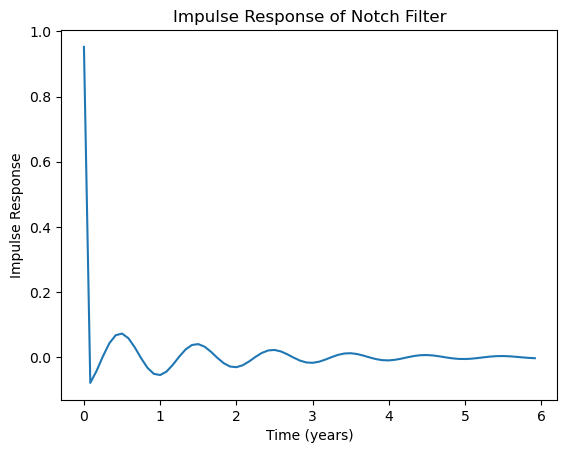

Text(0.5, 1.0, 'Frequency Response of Notch Filter')

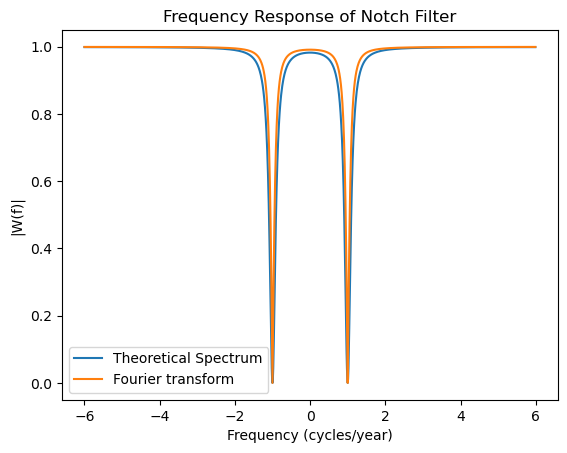

In [6]:

# Discretized Delta Function:
dt = 1/f_s # Sampling interval
delta_func = np.zeros(1200) # 1200 samples
delta_func[0] = 1

N = [a, b, c]
D = [1, B, C]

# Apply notch filter to delta input
impulse_response = ratFilter(N, D, delta_func)
print("Length of Impulse Response:", len(impulse_response))

# x-axis
x_axis = np.arange(0, 6, dt)
print("Length of x-axis", len(x_axis))

truncated = impulse_response[:int(6*f_s)]
print("Length of truncated data", len(truncated))

# Plot impulse response
plt.plot(x_axis, truncated)
plt.xlabel('Time (years)')
plt.ylabel('Impulse Response')
plt.title('Impulse Response of Notch Filter')
plt.show()


# Shift the signal
shifted = np.fft.ifftshift(impulse_response)

# Perform Fourier transform on shifted signal
dft = np.fft.fft(shifted)

# Shift the Fourier transform
shifted_dft = np.fft.fftshift(dft)

# Frequency axis for plotting
f_axis = np.fft.fftshift(np.fft.fftfreq(len(delta_func), dt))
theoretical = [amplitude_spectrum(f)**2 for f in f_axis]

# Plot frequency response
plt.plot(f_axis, theoretical, label="Theoretical Spectrum")
plt.plot(f_axis, np.abs(shifted_dft), label="Fourier transform")
plt.legend()
plt.xlabel('Frequency (cycles/year)')
plt.ylabel('|W(f)|')
plt.title('Frequency Response of Notch Filter')

# Global Mean CH$_4$ Data (6 marks, 1/1/1/1/2)

### The file `methane_global.csv` (on Quercus) contains globally averaged methane (CH$_4$) values (in parts per billion) every month from July 1983 to October 2023.
The measurements show clearly a rising trend in atmospheric CH$_4$. The trend is overlaid with a annual
oscillation. Your job is to remove the annual oscillation and display the trend more clearly. There
are two possible approaches: (a) you could apply your notch filter to the series to remove this
annual variation, or (b) you could Fourier transform it with `fft`, remove the annual variation by
setting the spectrum at appropriate frequencies to zero, and transform back to the time domain with
`ifft`.

Write code to accomplish the following:

 1. Before applying the filters, it is helpful to remove the trend of the signal using numpy
    function `polyfit`. Fit a straight line to your data and then detrend your data by removing the
    straight line. Plot both the original data and the detrended data.
 2. Apply your notch filter to the detrended data and add back the trend.
 3. FT the detrended data into the frequency domain, and plot both its amplitude and phase
    spectrum. Make another plot that zooms in at $f = [0, 2.5] \text{ cycles per year}$. Now set the
    Fourier spectrum corresponding to frequencies beyond $0.9 \text{ cycles per year}$ to zero, which
    effectively removes the annual oscillation. Transform the spectrum back to the time domain and
    add back the trend.
 4. Now plot the original data, the notch-filtered data from Part 2, and the f-domain filtered data
    from Part 3 on top of each other with different colors. Which method gives more satisfactory
    result? Can you think of any advantages/disadvantages in using either method?
 5. Now try redo Parts 2, 3, and 4 with the original data, not the detrended data. Of course you
    don't need to add back the trend after filtering any more. Display your results and comment
    on the importance of detrending before applying the filters.

/tmp/ipykernel_95/1280261281.py:22: ComplexWarning: Casting complex values to real discards the imaginary part
  y[n] += N[i] * x[n - i]
/tmp/ipykernel_95/1280261281.py:25: ComplexWarning: Casting complex values to real discards the imaginary part
  y[n] -= D[j] * y[n - j]


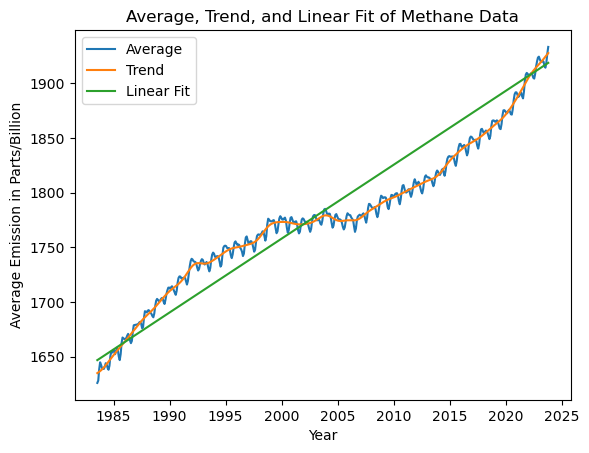

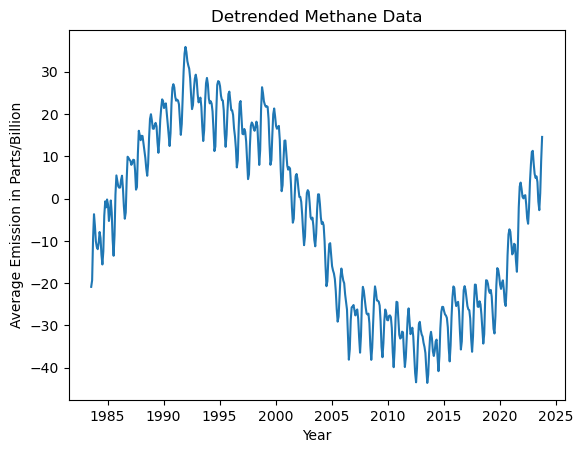

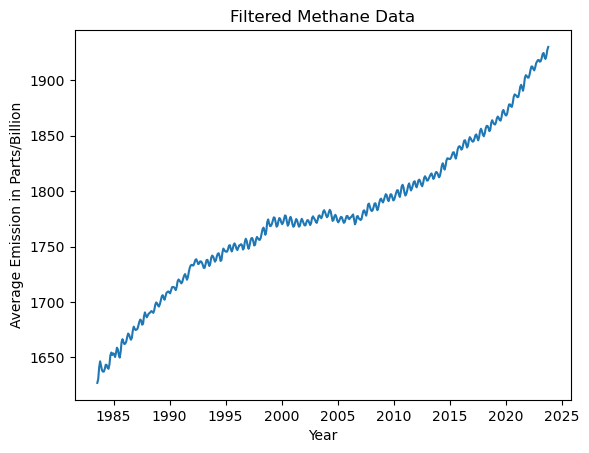

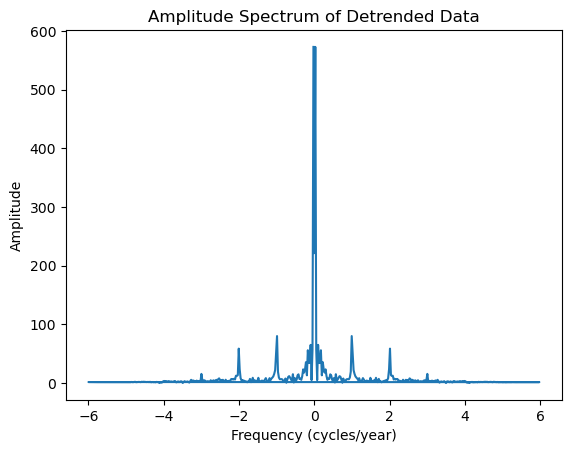

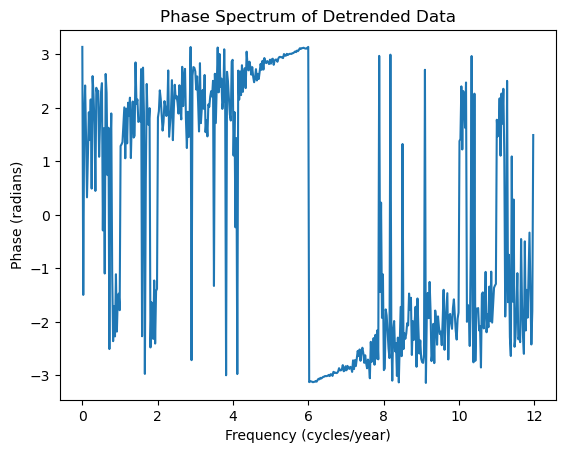

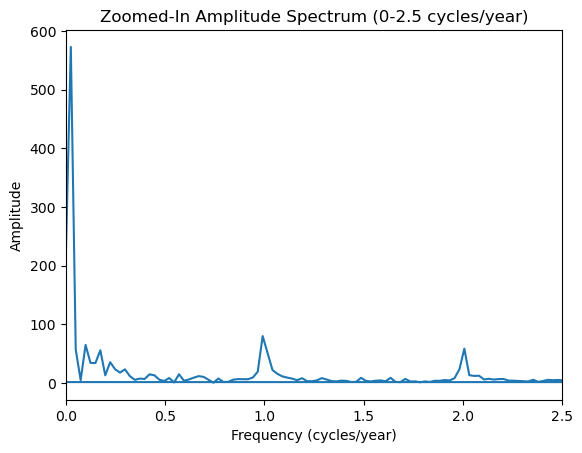

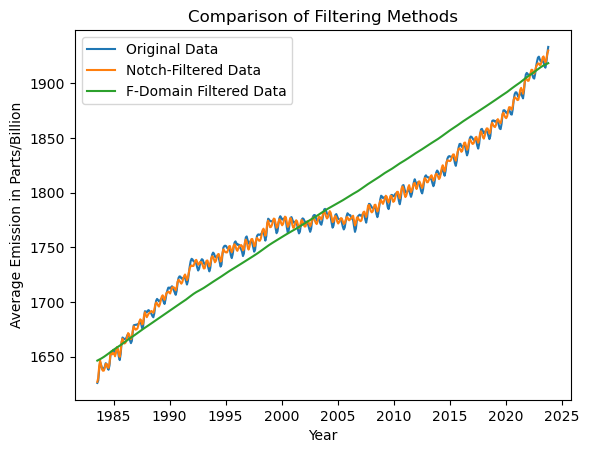

In [7]:
# Collab w/ Abramo Ginevra

yr, mnth, dml, avg, avg_unc, trend, trend_unc = np.loadtxt("methane_global.csv", delimiter=',', skiprows=1, unpack=True)

line_of_best_fit, *_ = np.polyfit(dml, avg, 1, full=True, w=avg_unc)

def linear_model(x):
    return line_of_best_fit[0]*x+line_of_best_fit[1]

line = linear_model(dml)

plt.figure()
plt.title("Average, Trend, and Linear Fit of Methane Data")
plt.xlabel("Year")
plt.ylabel("Average Emission in Parts/Billion")
plt.plot(dml, avg, label="Average")
plt.plot(dml, trend, label="Trend")
plt.plot(dml, line, label="Linear Fit")
plt.legend()
plt.figure()

# Plotting the Detrended Data
detrended_data = avg - line # removing the trend from avg
plt.title("Detrended Methane Data")
plt.xlabel("Year")
plt.ylabel("Average Emission in Parts/Billion")
plt.plot(dml, detrended_data, label="Detrended")
plt.figure()

## PART 2: Applying notch filter to detrended data
notch_filtered_data = ratFilter(N, D, detrended_data) + line
plt.title("Filtered Methane Data")
plt.xlabel("Year")
plt.ylabel("Average Emission in Parts/Billion")
plt.plot(dml, notch_filtered_data, label="Filtered Detrended Data")
plt.figure()

## PART 3: PLOTTING THE FOURIER TRANSFORM

# Compute Fourier transform of impulse response
detrended_data_fft = np.fft.fft(detrended_data) * dt
amplitude_spectrum = np.abs(detrended_data_fft)
phase_spectrum = np.angle(detrended_data_fft)

# Frequency axis for plotting
freq = np.fft.fftfreq(len(detrended_data), dt) 

# Amplitude Spectrum
plt.title("Amplitude Spectrum of Detrended Data")
plt.xlabel("Frequency (cycles/year)")
plt.ylabel("Amplitude")
plt.plot(freq, amplitude_spectrum, label="Amp Spectrum of Fourier Transform")
plt.figure()

# Phase Spectrum
plt.title("Phase Spectrum of Detrended Data")
plt.xlabel("Frequency (cycles/year)")
plt.ylabel("Phase (radians)")
x_axis = np.arange(len(phase_spectrum)) * 12 / len(phase_spectrum)
plt.plot(x_axis, phase_spectrum, label="Phase Spectrum of Fourier Transform")
plt.figure()

# Zooming in on f=[0, 2.5]
plt.plot(freq, amplitude_spectrum)
plt.xlim(0, 2.5)
plt.title("Zoomed-In Amplitude Spectrum (0-2.5 cycles/year)")
plt.xlabel("Frequency (cycles/year)")
plt.ylabel("Amplitude")
plt.figure()

freq_cutoff = 0.9  # Cycles/year
detrended_data_fft_filtered = detrended_data_fft.copy()
detrended_data_fft_filtered[np.abs(freq) > freq_cutoff] = 0

# Transform back to time domain
detrended_data_filtered = np.fft.ifft(detrended_data_fft_filtered).real
detrended_data_filtered += line

## PART 4: PLOTTING 
plt.plot(dml, avg, label="Original Data")
plt.plot(dml, notch_filtered_data, label="Notch-Filtered Data")
plt.plot(dml, detrended_data_filtered, label="F-Domain Filtered Data")
plt.title("Comparison of Filtering Methods")
plt.xlabel("Year")
plt.ylabel("Average Emission in Parts/Billion")
plt.legend()

/tmp/ipykernel_95/1280261281.py:22: ComplexWarning: Casting complex values to real discards the imaginary part
  y[n] += N[i] * x[n - i]
/tmp/ipykernel_95/1280261281.py:25: ComplexWarning: Casting complex values to real discards the imaginary part
  y[n] -= D[j] * y[n - j]


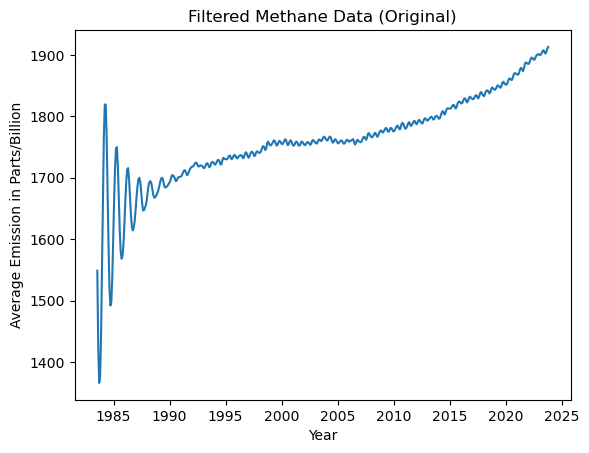

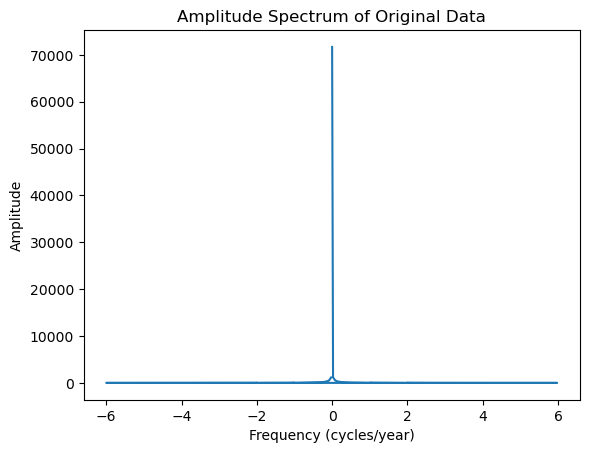

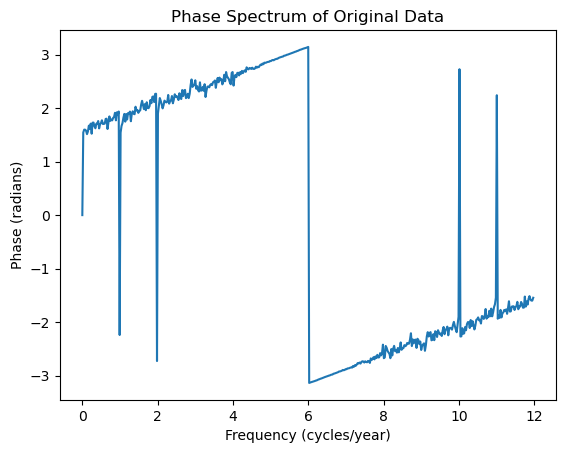

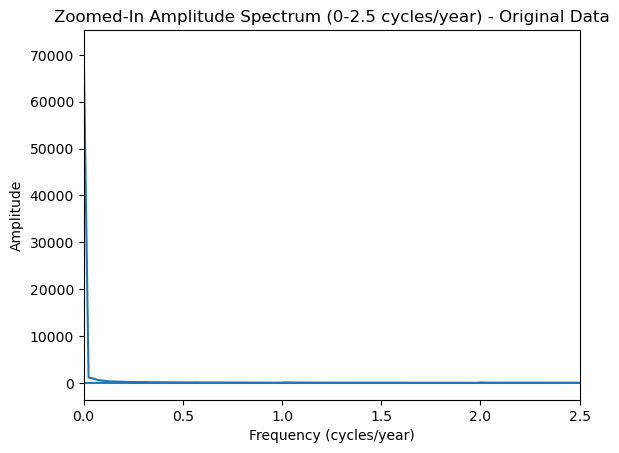

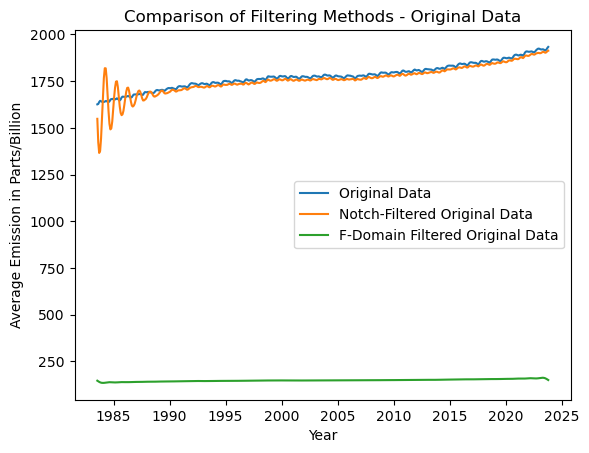

In [15]:
## PART 2: Applying notch filter to original data (without detrending)
notch_filtered_data_original = ratFilter(N, D, avg)
plt.title("Filtered Methane Data (Original)")
plt.xlabel("Year")
plt.ylabel("Average Emission in Parts/Billion")
plt.plot(dml, notch_filtered_data_original, label="Notch-Filtered Original Data")
plt.figure()

## PART 3: Fourier transform of original data
# Compute Fourier transform of original data
avg_fft = np.fft.fft(avg) * dt
amplitude_spectrum_original = np.abs(avg_fft)
phase_spectrum_original = np.angle(avg_fft)

# Frequency axis for plotting
freq_original = np.fft.fftfreq(len(avg), dt) 

# Amplitude Spectrum
plt.title("Amplitude Spectrum of Original Data")
plt.xlabel("Frequency (cycles/year)")
plt.ylabel("Amplitude")
plt.plot(freq_original, amplitude_spectrum_original, label="Amp Spectrum of Fourier Transform (Original)")
plt.figure()

# Phase Spectrum
plt.title("Phase Spectrum of Original Data")
plt.xlabel("Frequency (cycles/year)")
plt.ylabel("Phase (radians)")
x_axis_original = np.arange(len(phase_spectrum_original)) * 12 / len(phase_spectrum_original)
plt.plot(x_axis_original, phase_spectrum_original, label="Phase Spectrum of Fourier Transform (Original)")
plt.figure()

# Zooming in on f=[0, 2.5]
plt.plot(freq_original, amplitude_spectrum_original)
plt.xlim(0, 2.5)
plt.title("Zoomed-In Amplitude Spectrum (0-2.5 cycles/year) - Original Data")
plt.xlabel("Frequency (cycles/year)")
plt.ylabel("Amplitude")
plt.figure()

# Applying frequency domain filtering to original data
freq_cutoff = 0.9  # Cycles/year
avg_fft_filtered = avg_fft.copy()
avg_fft_filtered[np.abs(freq_original) > freq_cutoff] = 0

# Transform back to time domain
avg_filtered_original = np.fft.ifft(avg_fft_filtered).real

## PART 4: Plotting
plt.plot(dml, avg, label="Original Data")
plt.plot(dml, notch_filtered_data_original, label="Notch-Filtered Original Data")
plt.plot(dml, avg_filtered_original, label="F-Domain Filtered Original Data")
plt.title("Comparison of Filtering Methods - Original Data")
plt.xlabel("Year")
plt.ylabel("Average Emission in Parts/Billion")
plt.legend()
plt.show()
